Universidade Federal do Rio Grande do Sul (UFRGS)   
Programa de Pós-Graduação em Engenharia Civil (PPGEC)   

# PEC00025: Introdução Teoria das Vibrações -  TRABALHO 2.2 

### Nome: Renata Reis de Jesus 
### Matricula:00312133




In [28]:
#Importando os modulos.

import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as sc
import pickle as pk




## 1 - Matriz de Rigidez

A matriz de rigidez foi elaborada a partir da matriz de flexibilidade H. O processo consiste em aplicar cargas unitarias em cada nó livre da treliça e tomar nota dos deslocamentos correspondentes. Estes deslocamentos, resultarão em uma coluna da matriz de flexibilidade. Para a estrutura estudada, a matriz será de ordem 10.

In [29]:
# Matriz de Flexibilidade m/N
H1= np.array([[0.00014, 0.00020, 0.00023, 0.00024, 0.00024, 0.00022, 0.00019, 0.00015, 0.00010, 0.00005],
              [0.00020, 0.00037, 0.00044, 0.00047, 0.00047, 0.00043, 0.00038, 0.00030, 0.00020, 0.00010],
              [0.00023, 0.00044, 0.00061, 0.00066, 0.00066, 0.00062, 0.00054, 0.00043, 0.00030, 0.00015],
              [0.00024, 0.00047, 0.00066, 0.00080, 0.00081, 0.00077, 0.00067, 0.00054, 0.00037, 0.00019],
              [0.00024, 0.00047, 0.00066, 0.00081, 0.00090, 0.00086, 0.00076, 0.00061, 0.00043, 0.00021],
              [0.00022, 0.00043, 0.00062, 0.00077, 0.00086, 0.00090, 0.00081, 0.00065, 0.00046, 0.00023],
              [0.00019, 0.00038, 0.00054, 0.00067, 0.00076, 0.00081, 0.00079, 0.00065, 0.00046, 0.00023],
              [0.00015, 0.00030, 0.00043, 0.00054, 0.00061, 0.00065, 0.00065, 0.00059, 0.00042, 0.00021],
              [0.00010, 0.00020, 0.00030, 0.00037, 0.00043, 0.00046, 0.00046, 0.00042, 0.00035, 0.00018],
              [0.00005, 0.00010, 0.00015, 0.00019, 0.00021, 0.00023, 0.00023, 0.00021, 0.00018, 0.00012]])*1e-3 
 

Uma vez que a matriz de flexibilidade, é o inverso da matriz de rigidez tem-se: 

$$\mathbf{H}^{-1} = \mathbf{K}$$


In [30]:
# Matriz de rigidez N/m
K1 = np.linalg.inv(H1) 




## 2 - Matriz de Massa 

O caminho mais simples e direto para explicar forças inerciais neste modelo simplificado
é agrupar todas as massas na vizinhança de cada nó (mestre) e atribuí-las massas aos correspondentes graus de liberdade.
Para a treliça analisada, definiu-se uma massa distribuída de 1000 kg por unidade de comprimento, como as barras possuem um comprimento de 3m o valor associado por nó será de 30000g




In [31]:
# Lumped mass matrix in kg
M1 = np.array([[3, 0,  0,  0,  0,  0,  0,  0,  0, 0], 
               [0, 3,  0,  0,  0,  0,  0,  0,  0, 0], 
               [0, 0,  3,  0,  0,  0,  0,  0,  0, 0], 
               [0, 0,  0,  3,  0,  0,  0,  0,  0, 0], 
               [0, 0,  0,  0,  3,  0,  0,  0,  0, 0],
               [0, 0,  0,  0,  0,  3,  0,  0,  0, 0],
               [0, 0,  0,  0,  0,  0,  3,  0,  0, 0],
               [0, 0,  0,  0,  0,  0,  0,  3,  0, 0],
               [0, 0,  0,  0,  0,  0,  0,  0,  3, 0],
               [0, 0,  0,  0,  0,  0,  0,  0,  0, 3]])*1e3

## 3 - Modo de Vibrações e Frequencia Natural 

A seguir, a descrição do script utilizado para a obtenção das frequencias naturais, e seus respectivos modos de vibração da treliça estudada.

In [59]:
w21, Phi1 = sc.eig(K1, M1)

# Ensure ascending order of eigenvalues
iw   = w21.argsort()
w21  = w21[iw]
Phi1 = Phi1[:,iw]



# Eigenvalues to vibration frequencies
wk1  = np.sqrt(np.real(w21)) 
fk1  = wk1/2/np.pi





O script abaixo mostra os resultados como deslocamentos nodais no topo da treliça.

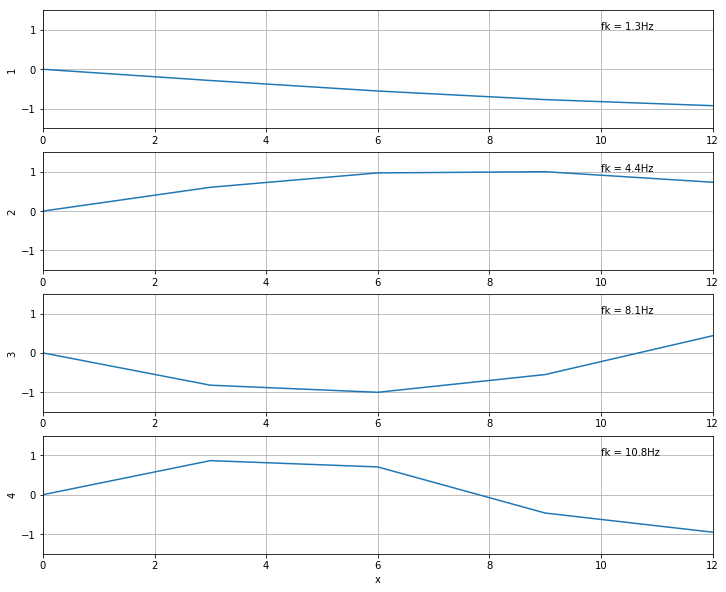

In [108]:
plt.figure(1, figsize=(12,10))
x = np.arange(0,36,3)

for k in range(4):
    pk = np.zeros(12)
    pk[1:-1] = Phi1[:,k]
    pk /= np.max(np.abs(pk))    
    
    plt.subplot(4,1,k+1)
    plt.plot(x, pk)
    
    plt.xlim( 0.0, 12.0);
    plt.ylim(-1.5,  1.5);  plt.ylabel(str(k+1));
    plt.text(10, 1, 'fk = {0:3.1f}Hz'.format(fk1[k]));
    plt.grid(True)

plt.xlabel('x');



## 4 - Resposta a um Impulso




### Cálculo Velocidade Inicial 

A partir da teoria da responsta impulsiva, a qual define que a velocidade inicial depende do impulso a qual a estrutura é submetida. Obteve-se o vetor velocidade inicial, que considerou dados como, força atuante de 10kN, para um intervalo  $ Td =\frac{Tn}{4} $


In [118]:
Fmax = np.max(fk1)

print(Fmax)
fa = 10000
Tn = 1/Fmax
Td = Tn/4
m = 3000
vo = fa*Td/m

vo_v=[0, 0, 0, 0, vo, 0, 0, 0, 0, 0]
uo_v = np.zeros(10)
print(vo)

28.949990847636315
0.028785271046169358


### 5 - Calculo dos parâmetros  


$\theta =\frac{\pi}{2} $

#### umax 

#### vo 


 


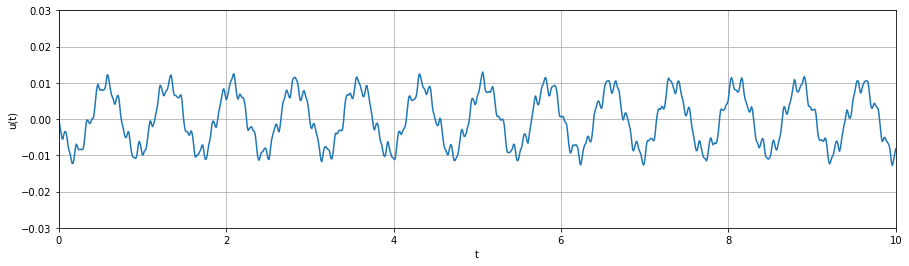

In [123]:

for k in range(10):
    
    Phit = Phi1.transpose()
    
xi = np.pi/2
UMAX = np.zeros(10)

for k in range(10):
        Mi=np.dot(np.dot(Phit[k],M1), Phi1[k])
        umax = (np.dot(np.dot(Phit[k], M1),vo_v)) / (wk1[k] * np.sin(xi)* Mi)
    
        UMAX[k] = umax
    
t = np.linspace(0,10,1000)
uk = np.zeros((10, 1000))

for k in range(10):

           uk[k,:]= UMAX[k]*np.cos(-wk1[k]*t - np.pi/2)
    
u = np.dot(Phi1, uk)

plt.figure(2, figsize=(15,4))
plt.plot(t,u[5,:])
plt.xlim(-0.0, 10.0);  plt.xlabel("t");
plt.ylim( -0.03,0.03); plt.ylabel("u(t)");
plt.grid(True)



## 5 - Amortecimento 

A seguir descriçã do script utilizado para calculo do amortecimento

In [122]:
zeta = np.zeros(10)
zeta[0] = 0.01
zeta[1] = 0.01
alfa1 = 2*(zeta[0]*wk1[0]-zeta[1]*wk1[1])/(wk1[0]**2-wk1[1]**2)
alfa0 = 2*zeta[0]*wk1[0]-alfa1*wk1[1]**2

for k in range (7):
    zeta[k+2] = (alfa0/(2*wk1[k+2]))+(alfa1*wk1[k+2]/2)

print(zeta)    
    

[0.01       0.01       0.011481   0.01697786 0.02324407 0.02630854
 0.03081843 0.03555543 0.04657543 0.        ]
